In [1]:
import warnings
warnings.filterwarnings('ignore')

# About this notebook

* Author: Anubhav Jain
* Github repo: https://github.com/computron/pymatgen_tutorials
* YouTube video: https://youtu.be/e4hSkv1Ghbk

![alt text](graphics/title.png "Learn Pymatgen Part 3: Getting Data with the Materials Project API")

# What is the Materials Project API?

* The Materials Project (https://www.materialsproject.org) is a **free** web site / database / design tool that contains  high quality simulated properties of various materials via density functional theory calculations.
* The API allows users to download the various data sets via computer programs such as ``pymatgen``.
    * Note: the API is written in a RESTful manner which means that the API is not tied to any one programming language or software library.
* Common uses of the data are to:
    * find materials with specific properties
    * help support a scientific analysis with theoretical data
    * use the data to train a machine learning model

    


  

# What data is available through the Materials Project API?
* At the time of this tutorial (August 2024), the data set contains:
    * &gt;150,000 materials structures
    * &gt;170,000 molecules structures
    * &gt;70,000 electronic band structures / density of states
    * &gt;50,000 x-ray absorption spectra
    * &gt;10,000 elastic tensors
    * &gt;7,000 dielectric tensors
    * &gt;3,000 piezoelectric tensors
    * &gt;1,500 phonon band structures / phonon DOS
    * (among other properties ...)

# Optional note #1: New API vs legacy API

* As of the  time of this tutorial (August 2024), there are currently **two** APIs for the Materials Project.
* The new API allows you to access the most recent data sets, offers more features, and will be more future-proof to learn.
* This tutorial will only cover the **new** API. It will **not** cover the legacy API.

![alt text](graphics/api_comparison.png "Comparison of old and new Materials Project API")





# Optional note #2: pymatgen's MPRester and the new API


* The main object used to access the Materials Project data is the ``MPRester`` class
* Historically, this class was implemented and designed by ``pymatgen``. However, with the release of new API, this class was entirely redesigned by the Materials Project team and made into a new library called ``mp-api``.
* Today, ``pymatgen`` will typicaly use the ``MPRester`` class installed in ``mp-api`` instead of its own implementation to access the new API.
* If you do not install ``mp-api``, you will be restricted to only basic API calls in ``pymatgen`` via its built-in ``_MPResterBasic`` implementation which works outside of ``mp-api``.
* We will **not** cover ``_MPResterBasic`` in this tutorial, so make sure to install ``mp-api`` before proceeding!

![alt text](graphics/MPRester.png "Old vs New MPRester flow chart")

# Required set up: Getting and setting your API Key

* You can get your API key at: https://next-gen.materialsproject.org/api

# Required set up: installing the ``mp-api`` library

* **To use the new API via ``pymatgen``, you should install the ``mp-api`` library by running the following command**:
    * ``pip install mp-api``
* If you do not install ``mp-api``, you will be limited to basic functionality only and many of the functions in this tutorial will not work!


# Importing MPRester

* If your set up is correct, you should be able to import ``MPRester`` and the type of object you get should be ``mp_api.client.mprester.MPRester``.
* Note that when creating the ``MPRester`` object, you either need to supply your API key or configure your API key using the pymatgen configuration file (better for hiding your key from others)
    * Briefly, you can run the following command to enter your API key into your configuration file: ``pmg config --add PMG_MAPI_KEY <USER_API_KEY>``
    * Full instructions on configuring your API key: https://pymatgen.org/usage.html

In [2]:
from pymatgen.ext.matproj import MPRester
mpr = MPRester()  # use this line if you set up the configuration file
# mpr = MPRester("YOUR_API_KEY")  # use this line to enter your API key manually

print(type(mpr)) # should be 'mp_api.client.mprester.MPRester'

<class 'mp_api.client.mprester.MPRester'>


# Retrieving data using MPRester: built-in convenience functions

* MPRester contains many convenience functions for getting many common types of data such as crystal structures
* To use these functions, you typically need to know the Materials Project ID (``material_id``) of the material you want data for
* You can get the ``material_id`` by browsing the Materials Project web site (www.materialsproject.org) or by performing a search via the API.
* We'll demonstrate API searches later, for now we will use some known ``material_id`` values to get data.

In [3]:
# Retrieve the crystal structure for a specific material by its Materials Project ID

material_id = "mp-2534"  # Example material ID for GaAs

# Fetch structure for the material
structure = mpr.get_structure_by_material_id(material_id)

# Print fetched data
print(f"--Structure:--\n {structure}")

Retrieving MaterialsDoc documents: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 1269.08it/s]

--Structure:--
 Full Formula (Ga1 As1)
Reduced Formula: GaAs
abc   :   4.065993   4.065993   4.065993
angles:  59.999991  59.999992  59.999994
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Ga    0     0     0            0
  1  As    0.25  0.25  0.25        -0


Retrieving ElectronicStructureDoc documents: 100%|██████████████████████████████████████| 1/1 [00:00<00:00, 7752.87it/s]


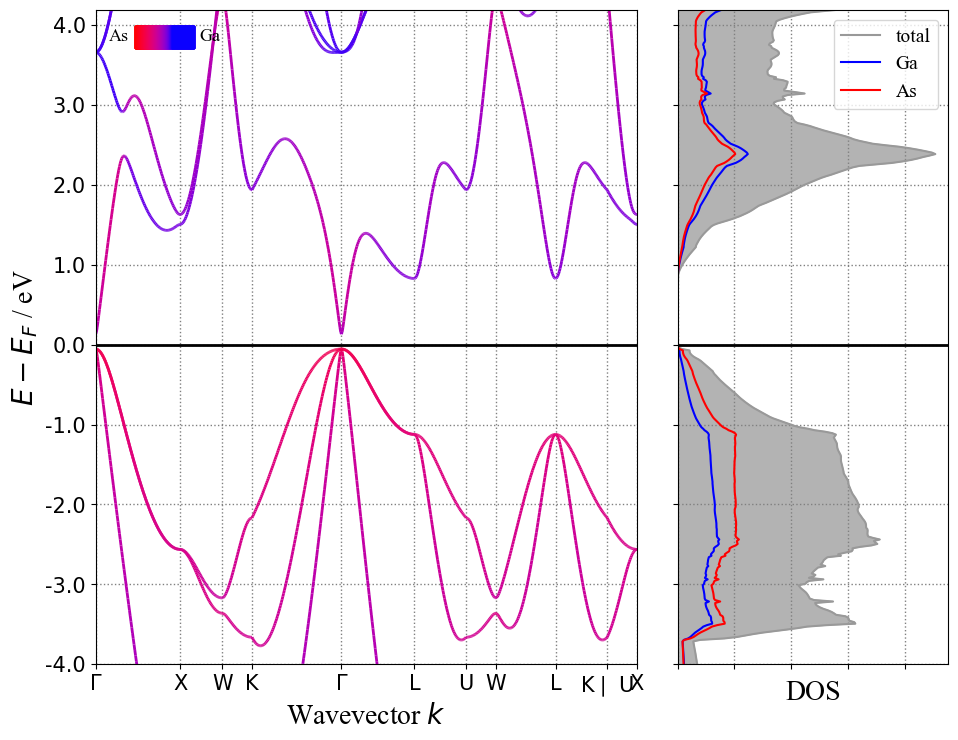

In [4]:
# Retrieve the electronic band structure and DOS by the Materials Project ID 
bs = mpr.get_bandstructure_by_material_id("mp-2534")  # mp-2534 is GaAs
dos = mpr.get_dos_by_material_id("mp-2534")

# Plot using pymatgen
from pymatgen.electronic_structure.plotter import BSDOSPlotter
bsp = BSDOSPlotter()
ax_bs, ax_dos = bsp.get_plot(bs, dos)

Retrieving PhononBSDOSDoc documents: 100%|██████████████████████████████████████████████| 1/1 [00:00<00:00, 3266.59it/s]


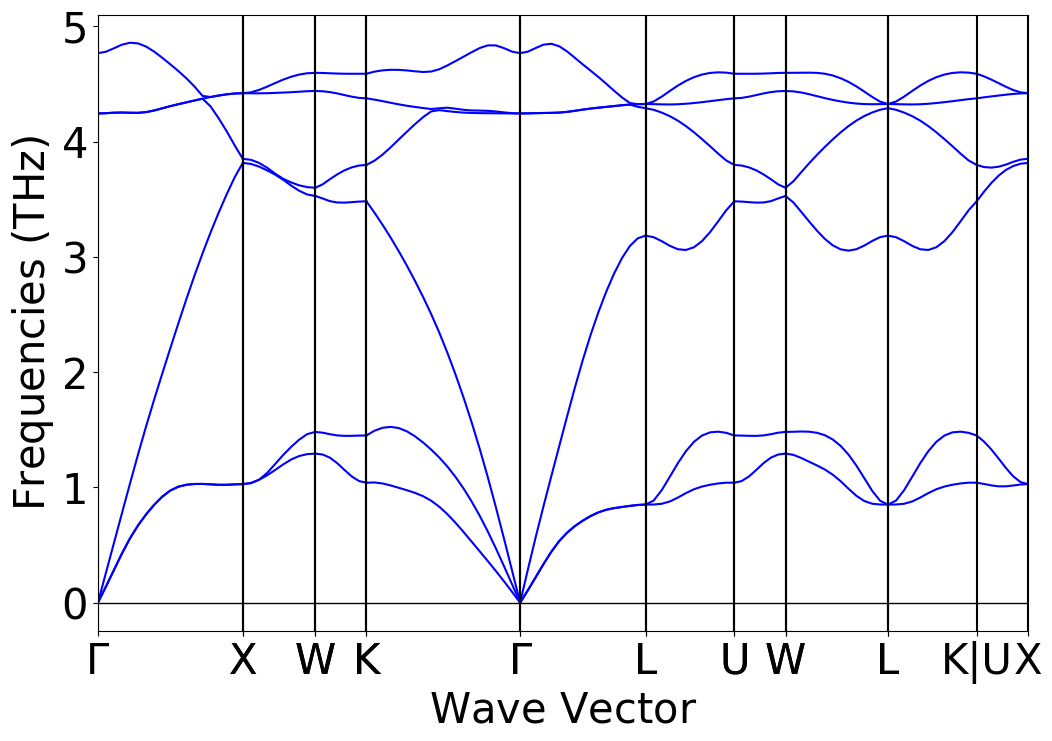

In [5]:
# Retrieve the phonon band structure by Materials Project ID
pbs = mpr.get_phonon_bandstructure_by_material_id("mp-406")  # mp-406 is CdTe

# Plot using pymatgen
from pymatgen.phonon.plotter import PhononBSPlotter
plotter = PhononBSPlotter(pbs)
plt = plotter.get_plot()

Retrieving SurfacePropDoc documents: 100%|██████████████████████████████████████████████| 1/1 [00:00<00:00, 3437.95it/s]


<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

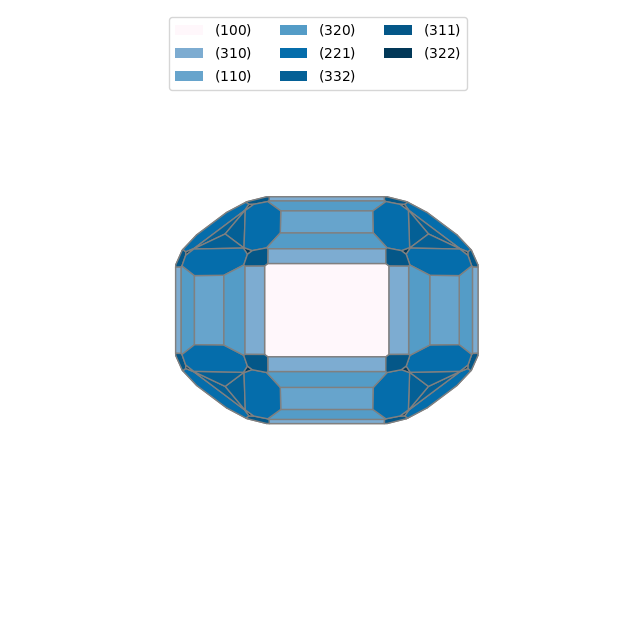

In [6]:
# Get the Wulff shape of a material (currently available for selected elements only)
ws = mpr.get_wulff_shape("mp-135")  # mp-135 is Li
ws.get_plot()

# Using Sub-Resters for Additional Functionality

* The built-in convenience functions of ``MPRester`` are just a small fraction of the functionality available through the Materials Project REST API
* To access other functions and data as well as to search for materials, you need to use one of the many "Sub-Resters" of MPRester
* Each "Sub-Rester" helps retrieve a particular type of data from the Materials Project using one of the REST API endpoints
    * The API endpoints are listed here: https://next-gen.materialsproject.org/api#accessing-data
    * These API endpoints correspond to the ``suffix`` parameter of the Sub-Rester
* Sub-Resters helps parallelize development, maintenance, and testing of the code across these various endpoints
    * This greatly helps development and maintenance of the REST API and also helps with data transfer efficiency
    * However, it can make usage more difficult for users because you need to find the appropriate Sub-Rester, and you may need to combine information from multiple Sub-Resters to accomplish your goal

![alt text](graphics/subresters.png "SubResters and API interaction")

# Example 1: Summary Sub-Rester

* One of the most common Sub-Resters you may want to use is the ``SummaryRester``
* The ``SummaryRester`` is the closest you get to a "one-stop-shop" when searching for materials data. It allows you to search over a variety of different fields and retrieve many kinds of information about a material.

![alt text](graphics/SummaryRester.png "Diagram of the SummaryRester")

In [7]:
summary_subrester = mpr.materials.summary  # Sub-Resters are usually attributes of MPRester

results = summary_subrester.search(elements=["Si", "O"], # Si & O are required, but other elements also allowed
                                   exclude_elements=["Ca"], # no Calcium allowed
                                   num_elements=3, # 3 unique elements, i.e., ternaries
                                   band_gap=(0.5, 1.0))  # band gap from 0.5 - 1.0 eV

print(f"The number of returned materials is: {len(results)}")
print("--First material (SummaryDoc)--")
print(results[0])  # This is a SummaryDoc object for this Rester

Retrieving SummaryDoc documents: 100%|███████████████████████████████████████████████| 36/36 [00:00<00:00, 69647.11it/s]

The number of returned materials is: 36
--First material (SummaryDoc)--
MPDataDoc<SummaryDoc>
builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 51, 6, 180000), license='BY-C'),
nsites=5,
elements=[Element Ba, Element O, Element Si],
nelements=3,
composition=Composition('Ba1 Si1 O3'),
composition_reduced=Composition('Ba1 Si1 O3'),
formula_pretty='BaSiO3',
formula_anonymous='ABC3',
chemsys='Ba-O-Si',
volume=56.48771473314591,
density=6.273519937114947,
density_atomic=11.297542946629182,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Pm-3m', number=221, point_group='m-3m', symprec=0.1, version='2.0.2'),
property_name='summary',
material_id=MPID(mp-1016821),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 11, 22, 19, 51, 6, 180000),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1792681), last_u

In [8]:
# Accessing attributes of the SummaryDoc document
print(f"--Structure:--\n {results[0].structure}")
print(f"Band gap: {results[0].band_gap}")

--Structure:--
 Full Formula (Ba1 Si1 O3)
Reduced Formula: BaSiO3
abc   :   3.836937   3.836937   3.836937
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Ba    0    0    0           0
  1  Si    0.5  0.5  0.5         0
  2  O     0.5  0.5  0          -0
  3  O     0.5  0    0.5        -0
  4  O     0    0.5  0.5        -0
Band gap: 0.9473000000000003


In [9]:
# Being data-efficient by restricting 'fields'

# This will result in faster queries and less data transfer
results = mpr.materials.summary.search(elements=["Si", "O"], 
                                       num_elements=3,
                                       exclude_elements=["Ca"], # no Calcium allowed
                                       band_gap=(0.5, 1.0),
                                       fields=["material_id",  # We will just retrieve the data in these fields
                                               "band_gap", 
                                               "symmetry",
                                               "composition",
                                               "origins"])
print(results[0])

Retrieving SummaryDoc documents: 100%|███████████████████████████████████████████████| 36/36 [00:00<00:00, 69263.74it/s]

MPDataDoc<SummaryDoc>
composition=Composition('Ba1 Si1 O3'),
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Pm-3m', number=221, point_group='m-3m', symprec=0.1, version='2.0.2'),
material_id=MPID(mp-1016821),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1792681), last_updated=datetime.datetime(2020, 11, 12, 6, 17, 46, 275000)), PropertyOrigin(name='energy', task_id=MPID(mp-1792681), last_updated=datetime.datetime(2023, 8, 3, 18, 52, 10, 879000)), PropertyOrigin(name='magnetism', task_id=MPID(mp-1792681), last_updated=datetime.datetime(2020, 11, 12, 6, 17, 46, 275000))],
band_gap=0.9473000000000003

Fields not requested:
['builder_meta', 'nsites', 'elements', 'nelements', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formati

In [10]:
# Getting the individual calculations associated with certain properties - these are called "Tasks"
# Note that this is not complete, so to get the origins of other properties you may need to use the Sub-Rester for that property
print(results[0].origins)

[PropertyOrigin(name='structure', task_id=MPID(mp-1792681), last_updated=datetime.datetime(2020, 11, 12, 6, 17, 46, 275000)), PropertyOrigin(name='energy', task_id=MPID(mp-1792681), last_updated=datetime.datetime(2023, 8, 3, 18, 52, 10, 879000)), PropertyOrigin(name='magnetism', task_id=MPID(mp-1792681), last_updated=datetime.datetime(2020, 11, 12, 6, 17, 46, 275000))]


# Sub-Rester Example 2: Task

* Recall that a single material may have many calculations (Tasks) associated with it, and the overall data from a material is combination of data taken from several Tasks.
* The ``TaskRester`` allows you to look up the details of an individual calculation, including input parameters and outputs
* It also has a convenience function to get the trajectory of a calculation (all steps in a structure relaxation)


![alt text](graphics/TaskRester.png "Diagram of the TaskRester")

In [11]:
results = mpr.materials.tasks.search(task_ids=["mp-1792681"])  # this is a "static" calculation

print("--input.incar--")
print(results[0].input.parameters)
print("--output.structure--")
print(results[0].output.structure)
print("--output.forces--")
print(results[0].output.forces)
print("--output.energy--")
print(results[0].output.energy)

# note: more information is in the 'calcs_reversed' key, but not demo'ed here
print("--input--")
print(results[0].calcs_reversed[0].input)
print("--output--")
print(results[0].calcs_reversed[0].output)

Retrieving TaskDoc documents: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1408.90it/s]

--input.incar--
{'SYSTEM': 'unknown system', 'LCOMPAT': False, 'PREC': 'accura', 'ENMAX': 520.0, 'ENAUG': 605.392, 'EDIFF': 5e-05, 'IALGO': 38, 'IWAVPR': 10, 'NBANDS': 32, 'NBANDSLOW': -1, 'NBANDSHIGH': -1, 'NELECT': 32.0, 'TURBO': 0, 'IRESTART': 0, 'NREBOOT': 0, 'NMIN': 0, 'EREF': 0.0, 'ISMEAR': -5, 'SIGMA': 0.05, 'KSPACING': 0.5, 'KGAMMA': True, 'KBLOWUP': True, 'LREAL': True, 'ROPT': [-0.00025, -0.00025, -0.00025], 'LMAXPAW': -100, 'LMAXMIX': 2, 'NLSPLINE': False, 'ISTART': 0, 'ICHARG': 2, 'INIWAV': 1, 'ISPIN': 2, 'LNONCOLLINEAR': False, 'MAGMOM': [0.6, 0.6, 0.6, 0.6, 0.6], 'NUPDOWN': -1.0, 'LSORBIT': False, 'SAXIS': [0.0, 0.0, 1.0], 'LSPIRAL': False, 'QSPIRAL': [0.0, 0.0, 0.0], 'LZEROZ': False, 'LASPH': True, 'LMETAGGA': False, 'NELM': 100, 'NELMDL': -5, 'NELMIN': 2, 'ENINI': 520.0, 'LDIAG': True, 'LSUBROT': False, 'WEIMIN': 0.0, 'EBREAK': 3.9e-07, 'DEPER': 0.3, 'NRMM': 4, 'TIME': 0.4, 'AMIX': 0.4, 'BMIX': 1.0, 'AMIN': 0.1, 'AMIX_MAG': 1.6, 'BMIX_MAG': 1.0, 'IMIX': 4, 'MIXFIRST': F

In [12]:
traj = mpr.materials.tasks.get_trajectory("mp-19017")  # example of a custom function in a SubRester
print(traj[0])  # the entire relaxation trajectory as pymatgen.core.trajectory.Trajectory.as_dict()

Retrieving TaskDoc documents: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 4169.29it/s]

{'@module': 'pymatgen.core.trajectory', '@class': 'Trajectory', 'species': [{'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'Li'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'Li'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'Li'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'Li'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'O'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'O'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'O'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'O'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'O'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'O'}, {'@module': 'pymatgen.core.periodic_table', '@class': 'Element', 'element': 'O'}, {'@module': 'pymat

# Sub-Rester Example 3: Elasticity

* Many materials properties have their own Sub-Rester associated with them, which allows you to search on those properties
* For example, to access the full elastic tensor and derived quantities such as sound velocity estimated from the elastic constants, one would use the ``ElasticityRester``

![alt text](graphics/ElasticityRester.png "Diagram of the ElasticityRester")



In [13]:
elasticity = mpr.elasticity.search("mp-2534")[0]  # mp-2534 is GaAs
print(elasticity)

Retrieving ElasticityDoc documents: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 7096.96it/s]

MPDataDoc<ElasticityDoc>
builder_meta=EmmetMeta(emmet_version='0.71.1', pymatgen_version='2023.10.4', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 10, 20, 7, 0, 38, 698000), license=None),
nsites=2,
elements=[Element As, Element Ga],
nelements=2,
composition=Composition('Ga1 As1'),
composition_reduced=Composition('Ga1 As1'),
formula_pretty='GaAs',
formula_anonymous='AB',
chemsys='As-Ga',
volume=47.54157907319905,
density=5.0521672555915,
density_atomic=23.770789536599526,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='F-43m', number=216, point_group='-43m', symprec=0.1, version='1.16.5'),
property_name='elasticity',
material_id=MPID(mp-2534),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 10, 20, 7, 0, 38, 698000),
origins=[],
warnings=[],
structure=Structure Summary
Lattice
    abc : 4.066269885257185 4.066269885257185 4.066269885257185
 angles : 59.99999999999999 59.99999999999999 59

In [14]:
print(f"--elastic tensor--\n: {elasticity.elastic_tensor}")
print(f"--elastic-constant-derived sound velocity--\n {elasticity.sound_velocity}")

# Note that one needs context for the data
# Below is NOT the thermal conductivity of crystalline GaAs but rather the glassy limit
print(f"--elastic-constant-derived glassy limit of thermal conductivity--\n {elasticity.thermal_conductivity}")

--elastic tensor--
: raw=((99.09569241484813, 41.56515260494345, 41.56515260494345, 2.9143354396410354e-16, -7.216449660063516e-16, 1.1657341758564142e-15), (41.56515260494345, 99.09569241484819, 41.56515260494348, -9.992007221626407e-16, 4.440892098500625e-16, 5.5376874085430985e-15), (41.56515260494345, 41.56515260494348, 99.09569241484822, -1.054711873393899e-15, 1.2767564783189302e-15, 4.440892098500626e-16), (2.9143354396410354e-16, -9.992007221626407e-16, -1.054711873393899e-15, 51.38793284561595, 0.0, -6.972611193684198e-32), (-7.216449660063516e-16, 4.440892098500625e-16, 1.2767564783189302e-15, 0.0, 51.387932845615964, -1.4263016558273546e-15), (1.1657341758564142e-15, 5.5376874085430985e-15, 4.440892098500626e-16, -6.972611193684198e-32, -1.4263016558273546e-15, 51.387932845615985)) ieee_format=((99.0, 42.0, 42.0, 0.0, 0.0, 0.0), (42.0, 99.0, 42.0, 0.0, 0.0, -0.0), (42.0, 42.0, 99.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 51.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 51.0, 0.0), (0.0, -0.0,

# Advanced searches: using multiple Resters

* Sometimes, you are not able to perform the query or get the data you want using a single Sub-Rester
* In this example, we want to search using both band gap and the total static dielectric constant, and get detailed data on both properties
* In that case, you need to merge information from multiple Sub-Resters
* A procedure for doing this is demonstrated next
![alt text](graphics/nested_search.png "Nesting search using multiple Resters")

In [15]:
from emmet.core.summary import HasProps

# Use SummaryRester for part 1 of search
search_1 = mpr.materials.summary.search(has_props=[HasProps.dielectric], 
                                        band_gap=[1.5, 3], 
                                        elements=["O"], 
                                        fields=["material_id", "band_gap"])
search_1_data_dict = {x.material_id: x for x in search_1}
search_1_mpids = search_1_data_dict.keys()

# Use DielectricRester for part 2 of search
search_2 = mpr.materials.dielectric.search(material_ids=search_1_mpids, 
                                           e_total=[5, 10], 
                                           fields=["material_id", "e_total", 
                                                   "e_ionic", "e_electronic", 
                                                   "composition", "structure"])
search_2_data_dict = {x.material_id: x for x in search_2}
search_2_mpids = search_2_data_dict.keys()

# (repeat the above steps for other steps to filter the data as needed)

Retrieving DielectricDoc documents: 100%|█████████████████████████████████████████| 367/367 [00:00<00:00, 402855.16it/s]


In [16]:
# Now merge the data
from collections import namedtuple
MaterialsData = namedtuple("MaterialsData", ["summary_data", "dielectric_data"])  # container for the data

all_data = []
for mpid in search_2_mpids:  # only the mpids matching both criteria
    all_data.append(MaterialsData(summary_data=search_1_data_dict[mpid], 
                                  dielectric_data=search_2_data_dict[mpid]))

# Note that if you want the band_gap, you need to get it from summary_data.
# But if you want the e_total, you need to get it from dielectric_data!
print(f"Number of results: {len(all_data)}")
print("----First result properties----")
print(f"--band gap--\n {all_data[0].summary_data.band_gap}")
print(f"--static dielectric constant--\n{all_data[0].dielectric_data.e_total}")
print(f"--all summary data retrieved--\n{all_data[0].summary_data}")
print(f"--all dielectric data retrieved--\n{all_data[0].dielectric_data}")


Number of results: 367
----First result properties----
--band gap--
 1.706
--static dielectric constant--
6.3364078699999995
--all summary data retrieved--
MPDataDoc<SummaryDoc>
material_id=MPID(mp-1095283),
band_gap=1.706

Fields not requested:
['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_norma

# Being faster and more data-efficient with Materials Project

Knowing how to be data-efficient when using the REST API is good for several reasons. It is helpful for you because it results in much faster results and lower data/memory usage on your side when conducting analyses. It is also much better for the Materials Project because it avoids unnecessary data transfer costs. There are several things you can do to make your queries faster and more data-efficient:

* As already covered, restrict the data returned to the specific fields of interest, to the extent possible:
```
with MPRester("your_api_key_here") as mpr:
    docs = mpr.materials.summary.search(fields=["material_id", "volume", "elements"])

```

* If you are just exploring / testing queries and don't want to wait for thousands of results to be retrieved, use ``num_chunks=1`` and ``chunk_size=10`` parameters when calling ``search()`` to limit to 10 example results. This works for all searches with all Resters and avoids unnecessary calls:
```
with MPRester("your_api_key_here") as mpr:
    mpr.summary.search(band_gap=[0,10], num_chunks=1, chunk_size=10)
```

* If you need to get data for many materials, pass the ``materials_ids`` as a list. This minimizes the number of calls to the API (i.e., don't call ``search()`` thousands of times!):
```
with MPRester("your_api_key_here") as mpr:
    docs = mpr.materials.summary.search(material_ids=["mp-149", "mp-13", "mp-22526"])
```

* For more tips, see https://docs.materialsproject.org/downloading-data/using-the-api/tips-for-large-downloads

# More information

More information about the Materials Project API can be found in the official docs: https://docs.materialsproject.org/downloading-data/how-do-i-download-the-materials-project-database